In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
y=iris.target

In [ ]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x=iris.data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [ ]:
naive_bayes_classifier = GaussianNB()


In [ ]:
naive_bayes_classifier.fit(x_train, y_train)


GaussianNB()

In [ ]:
y_pred = naive_bayes_classifier.predict(x_test)


In [ ]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9210526315789473


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.87      0.93      0.90        14
   virginica       0.90      0.82      0.86        11

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

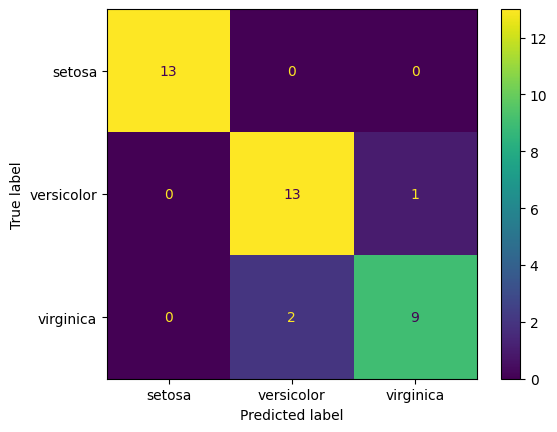

In [ ]:
disp.plot()
plt.show()

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 38 points : 3


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import re
# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
od.download("https://www.kaggle.com/datasets/uciml/news-aggregator-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadmahadsid
Your Kaggle Key: ··········


100%|██████████| 28.0M/28.0M [00:00<00:00, 95.3MB/s]


In [ ]:
file =('news-aggregator-dataset/uci-news-aggregator.csv')
df = pd.read_csv(file)

df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
def normalize_text(s):
    s = s.lower()
    return s

df['TEXT'] = [normalize_text(s) for s in df['TITLE']]

In [ ]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,TEXT
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,fed official says weak data caused by weather ...
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,fed's charles plosser sees high bar for change...
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550,us open stocks fall after fed official hints a...
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,fed risks falling behind the curve' charles pl...
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,fed's plosser nasty weather has curbed job growth


In [ ]:
df['TITLE'][2170]

'George Zimmerman Signs Autographs At Florida Gun Show'

In [ ]:
df['CATEGORY'][2170]

'e'

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['TEXT'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['CATEGORY'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb.score(x_test, y_test)

0.9252994649874532

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
y_pred

array([0, 3, 2, ..., 0, 3, 0])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:

corpus = ['This is sports related blog here we talk about cricket football tennis.',
          'This news channel talks about politics of all political parties.',
          'And the best movie of the year is scary movie.',
          'cristiano ronaldo plays football in sports',
          'The scary movie won the oscars this year',
          'This blog tells virat kolhi is a cricket player',
          'kenny plays saxophone in a movie'
          ]

classes = ["sports", "news", "movies", "sports", "movies", "sports", "movies"]


In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names_out()

array(['about', 'all', 'and', 'best', 'blog', 'channel', 'cricket',
       'cristiano', 'football', 'here', 'in', 'is', 'kenny', 'kolhi',
       'movie', 'news', 'of', 'oscars', 'parties', 'player', 'plays',
       'political', 'politics', 'related', 'ronaldo', 'saxophone',
       'scary', 'sports', 'talk', 'talks', 'tells', 'tennis', 'the',
       'this', 'virat', 'we', 'won', 'year'], dtype=object)

In [ ]:
print(X.toarray())


[[1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1
  0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
  0 0]
 [0 0 1 1 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0
  0 1]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 0 0
  1 1]
 [0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
  0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0]]


In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(classes)

LabelEncoder()

In [ ]:
Y = le.transform(classes)

In [ ]:
train = X[:5]
train_tr = Y[:5]

In [ ]:
test = X[5:]
test_tr = Y[5:]

In [ ]:
nb = MultinomialNB()
nb.fit(train, train_tr)

MultinomialNB()

In [ ]:
pred = nb.predict(test)
pred

array([2, 0])

In [ ]:
accuracy = accuracy_score(test_tr, pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
